In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
df = pd.read_csv('Ecommerce.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [4]:
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [5]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

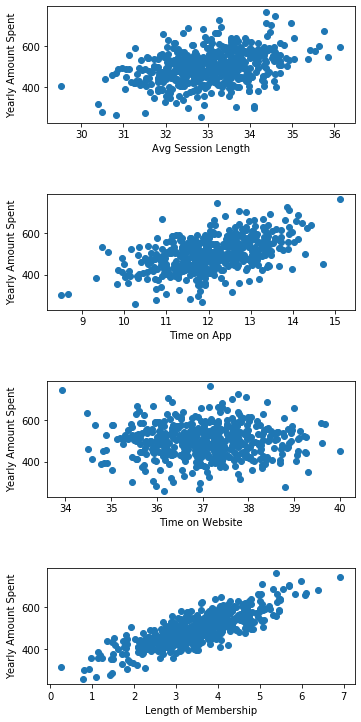

In [6]:
X = df[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']
fig, axis = plt.subplots(X.shape[1], 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

for i, feature in enumerate(X.columns.tolist()):
    axis[i].scatter(df[feature], y)
    axis[i].set_xlabel(feature)
    axis[i].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [7]:
X = df['Length of Membership']
y = df['Yearly Amount Spent']
print(X.head())
y.head()

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64


0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

### Divide the dataset into training and test sets with the ratio 80:20.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [9]:
X_train.head()

369    5.047023
364    3.525806
355    2.627625
114    5.485977
319    4.069917
Name: Length of Membership, dtype: float64

In [10]:
y_train.head()

369    531.961551
364    482.144997
355    403.766902
114    642.101579
319    596.516698
Name: Yearly Amount Spent, dtype: float64

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [25]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    import numpy as np
    
    data_vector_with_ones = np.c_[np.ones(data_vector.shape[0]), data_vector]
    data_vector_with_ones_transpose = data_vector_with_ones.T
    result = np.dot(data_vector_with_ones_transpose, data_vector_with_ones)
    result = np.linalg.pinv(result)
    result = np.dot(result, data_vector_with_ones_transpose)
    b0, b1 = np.dot(result, response_vector)
    
    return b0, b1

In [41]:
b0, b1 = fit_1d_linear_regression(X_train, y_train)

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [35]:
def plot_fitted_line(b0,
                     b1,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.scatter(x, y)
    plt.plot(x, b0 + b1 * x, c='r')
    plt.savefig("{}.png".format(username))
    plt.show()

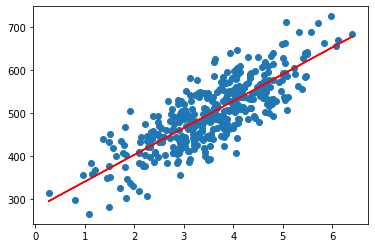

In [42]:
plot_fitted_line(b0, b1, X_train, y_train, 'Gayane')

### Plot example

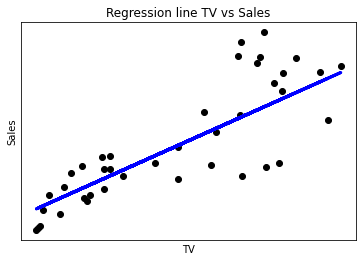

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

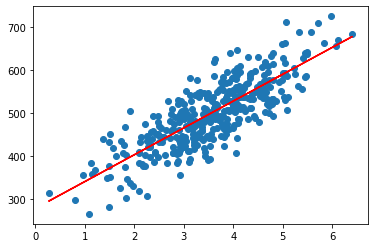

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.c_[np.ones(X_train.shape[0]), X_train], y_train)
b0_sklearn, b1_sklearn = model.intercept_, model.coef_[1]
plot_fitted_line(b0_sklearn, b1_sklearn, X_train, y_train, 'Gayane')

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(np.c_[np.ones(X_test.shape[0]), X_test])

print('Mean absolute error:\nFor my function: {0}\nFor sklearn model: {1}\n'.format(
    mean_absolute_error(y_test, b0 + b1 * X_test), mean_absolute_error(y_test, y_pred)
))

print('Mean squared error:\nFor my function: {0}\nFor sklearn model: {1}\n'.format(
    mean_squared_error(y_test, b0 + b1 * X_test), mean_squared_error(y_test, y_pred)
))

print('Root mean squared error:\nFor my function: {0}\nFor sklearn model: {1}\n'.format(
    np.sqrt(mean_squared_error(y_test, b0 + b1 * X_test)), np.sqrt(mean_squared_error(y_test, y_pred))
))

print('R-squared:\nFor my function: {0}\nFor sklearn model: {1}'.format(
    r2_score(y_test, b0 + b1 * X_test), r2_score(y_test, y_pred)
))


Mean absolute error:
For my function: 41.65976781142992
For sklearn model: 41.65976781142992

Mean squared error:
For my function: 2603.3650061421213
For sklearn model: 2603.3650061421213

Root mean squared error:
For my function: 51.02318106647332
For sklearn model: 51.02318106647332

R-squared:
For my function: 0.6513287966850421
For sklearn model: 0.6513287966850421


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [95]:
model_for_all_features = LinearRegression()
X = df[df.columns.difference(['Yearly Amount Spent'])]
y = df['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
model_for_all_features.fit(x_train, y_train)

y_pred = model_for_all_features.predict(x_test)

print('Mean absolute error: {0}'.format(mean_absolute_error(y_test, y_pred)))

print('Mean squared error: {0}'.format(mean_squared_error(y_test, y_pred)))

print('Root mean squared error: {0}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

print('R-squared: {0}'.format(r2_score(y_test, y_pred)))

Mean absolute error: 9.477046137152032
Mean squared error: 135.6226844619986
Root mean squared error: 11.64571528339924
R-squared: 0.9818359221712653
